As we are utilizing two different ml models the data set need to be prepreared to suit the strengths of each model.so we will prepare two data sets that utlize the streghts of each model

In [481]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt





In [482]:
df = pd.read_csv("data/bank-full.csv", delimiter=";")

In [483]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [484]:
df_rf = df.copy() # dataset for random forest
df_nn = df.copy()# data set for nueral network

# Handling missing values

checking the " unknown" values in the variables

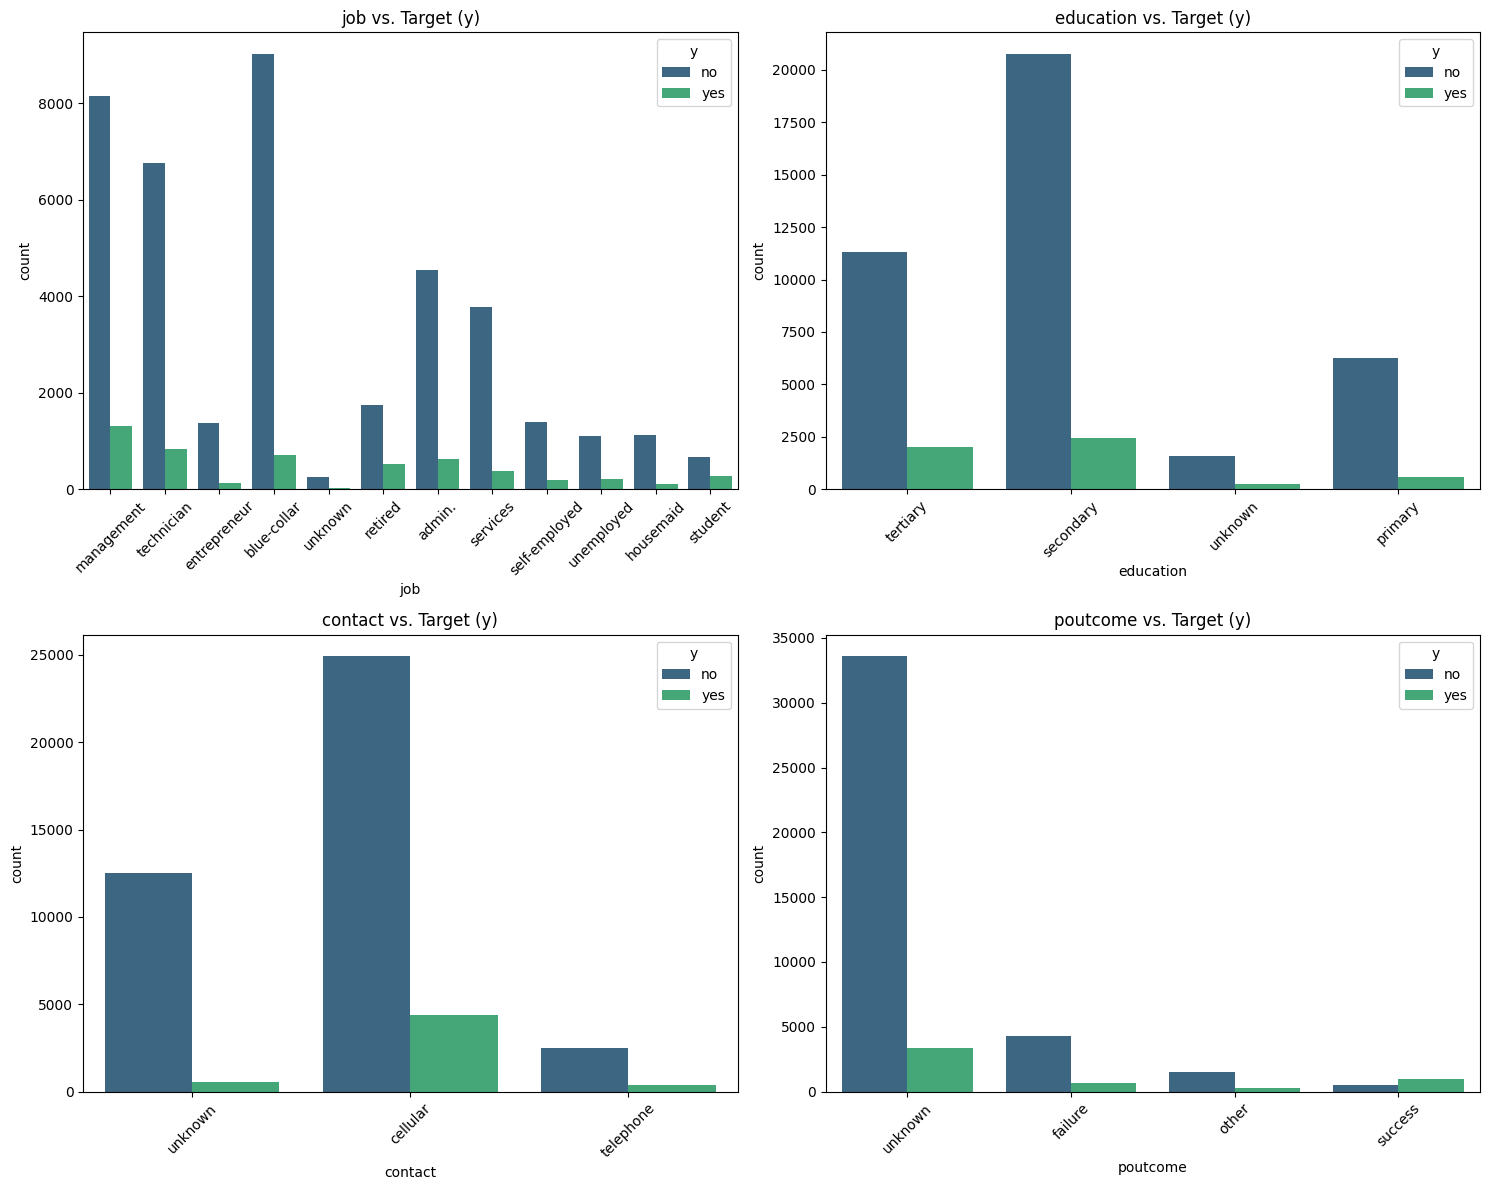

In [485]:
categorical_columns = ['job',  'education', 'contact', 'poutcome']


plt.figure(figsize=(15, 12))


for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i) 
    sns.countplot(data=df_nn, x=col, hue='y', palette="viridis")  # Group by target 'y'
    plt.title(f'{col} vs. Target (y)')
    plt.xticks(rotation=45)
    plt.tight_layout()


plt.show()

In [486]:
df_nn['job'].value_counts(normalize=True) * 100

job
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: proportion, dtype: float64

In [487]:
df_nn['education'].value_counts(normalize=True) * 100

education
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: proportion, dtype: float64

In [488]:
df_nn['contact'].value_counts(normalize=True) * 100

contact
cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: proportion, dtype: float64

In [489]:
df_nn['poutcome'].value_counts(normalize=True) * 100

poutcome
unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: proportion, dtype: float64

In [490]:

columns_with_unknown = ["job", "education"]

# Replace 'unknown' values with the mode of each specified column
for column in columns_with_unknown:
    mode = df_nn[df_nn[column] != "unknown"][column].mode()
    if not mode.empty:
        df_nn[column] = df_nn[column].replace("unknown", mode[0])

# Encoding categorical Data

In [491]:
label_cols = ['default', 'housing', 'loan', 'y']
label_encoder = LabelEncoder()
for col in label_cols:
    df_rf[col] = label_encoder.fit_transform(df_rf[col])
    df_nn[col] = label_encoder.fit_transform(df_nn[col])

In [492]:
df_rf["education"].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [493]:
one_hot_cols = ['job', 'marital', 'contact', 'poutcome','month','education']
df_rf = pd.get_dummies(df_rf, columns=one_hot_cols,drop_first=True)

In [494]:
df_rf.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'education_secondary', 'education_tertiary', 'education_unknown'],
      dtype='object')

In [495]:

one_hot_cols = ['job', 'marital', 'contact', 'poutcome']
df_nn = pd.get_dummies(df_nn, columns=one_hot_cols)

In [496]:
df_nn.shape

(45211, 34)

In [497]:
df["month"].value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [498]:

education_map = {'primary': 1, 'secondary': 2, 'tertiary': 3}
df_nn['education'] = df_nn['education'].map(education_map)


month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df_nn['month'] = df_nn['month'].map(month_map)

# Compute sin and cos values
df_nn['month_sin'] = np.sin(2 * np.pi * df_nn['month'] / 12)
df_nn['month_cos'] = np.cos(2 * np.pi * df_nn['month'] / 12)

# Round the sin and cos values to 4 decimal places
df_nn['month_sin'] = df_nn['month_sin'].round(4)
df_nn['month_cos'] = df_nn['month_cos'].round(4)

# Drop the original 'month' column
df_nn.drop('month', axis=1, inplace=True)

## Scaling numerical data

In [499]:
df_nn.drop(columns=['duration'], inplace=True)
df_rf.drop(columns=['duration'], inplace=True)
df_nn.to_csv("data/bank_nn.csv",index=False)
df_rf.to_csv("data/bank_rf.csv",index=False)